## Data Set selection

In [ ]:
!pip install typing_extensions

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
import os
os._exit(00)

In [ ]:
import pandas_profiling

<ipython-input-1-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
replace Data_Mining_Cup_2016_task.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# we've selected dataset from Kaggle
#link is - https://www.kaggle.com/datasets/oscarm524/predicting-returns-of-discounted-articles-sales?select=realclass_DMC_2016.txt

In [ ]:
import pandas as pd             # importing pandas library to use pandas dataframe
from datetime import datetime   # importing datetime
import numpy as np              # importing numpy
import matplotlib.pyplot as plt         # importing matplotlib for gragh plotting
import seaborn as sns            #importing seaborn
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta
from pandas import Timestamp, Timedelta
from dateutil.relativedelta import relativedelta

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler

In [ ]:
# loading dataset
order_df =  pd.read_csv("/content/orders_train.txt", sep = ';')

In [ ]:
#Dataset summary
order_df

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
0,a1000001,2014-01-01,i1000382,1972,44,3.0,1,10.00,29.99,0,0.0,c1010575,2,BPRG,0
1,a1000001,2014-01-01,i1000550,3854,44,3.0,1,20.00,39.99,0,0.0,c1010575,2,BPRG,0
2,a1000002,2014-01-01,i1001991,2974,38,8.0,1,35.00,49.99,0,0.0,c1045905,4,BPRG,0
3,a1000002,2014-01-01,i1001999,1992,38,8.0,1,49.99,49.99,0,0.0,c1045905,4,BPRG,1
4,a1000003,2014-01-01,i1001942,1968,42,8.0,1,10.00,35.99,0,0.0,c1089295,2,PAYPALVC,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325160,a1744175,2015-09-30,i1003273,3096,40,3.0,1,35.99,35.99,0,0.0,c1055877,3,CBA,1
2325161,a1744176,2015-09-30,i1003256,2117,42,3.0,1,39.99,39.99,0,0.0,c1124916,2,CBA,0
2325162,a1744177,2015-09-30,i1001692,1001,38,8.0,1,20.00,29.99,0,0.0,c1168483,3,CBA,0
2325163,a1744177,2015-09-30,i1001757,1085,38,8.0,1,18.00,35.99,0,0.0,c1168483,3,CBA,0


In [ ]:
# To create a copy of original data frame of data set
import copy
order_df_copy = copy.deepcopy(order_df)

##Data Preprocessing

In [ ]:
# Check for rows with at least one NaN value
order_df[order_df.isna().any(axis=1)]

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
8118,a1002753,2014-01-05,i1004001,8888,A,NaN,1,25.0,NaN,v1000102,0.0,c1090473,2,PAYPALVC,0
13518,a1004534,2014-01-07,i1004001,8888,A,NaN,1,50.0,NaN,v1000104,0.0,c1030785,2,PAYPALVC,0
18910,a1006402,2014-01-09,i1004001,8888,A,NaN,1,25.0,NaN,v1000107,0.0,c1037641,2,CBA,0
27762,a1009374,2014-01-12,i1004001,8888,A,NaN,1,50.0,NaN,v1000110,0.0,c1092627,4,PAYPALVC,0
51237,a1016897,2014-01-20,i1004001,8888,A,NaN,1,25.0,NaN,NaN,0.0,c1095410,2,BPRG,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289510,a1732742,2015-09-21,i1004001,8888,A,NaN,1,25.0,NaN,v1000807,0.0,c1316508,2,BPRG,0
2291985,a1733570,2015-09-22,i1004001,8888,A,NaN,1,100.0,NaN,v1000806,0.0,c1316716,2,BPRG,0
2308347,a1738754,2015-09-26,i1004001,8888,A,NaN,1,50.0,NaN,v1000814,0.0,c1318040,2,CBA,0
2308586,a1738835,2015-09-26,i1004001,8888,A,NaN,1,25.0,NaN,v1000813,0.0,c1318480,2,CBA,0


###Defining 1st preprocessing function - df_preprocess()

In [ ]:
def df_preprocess(order_df):

  # Remove rows with at least one NaN value
  order_df = order_df.dropna()

  # Rename price column to orderPrice Column
  order_df = order_df.rename(columns = {'price' : 'orderPrice'})

  # Calculate 'perUnitPrice' and replace NaN with 0
  order_df['perUnitPrice'] = round((order_df['orderPrice'] / order_df['quantity']), 2).replace(np.nan, 0)

  # calculate return price
  order_df['returnPrice'] = order_df['perUnitPrice'] * order_df['returnQuantity']

  # Converting datetime from string to Datetime format
  order_df['orderDate']  = pd.to_datetime(order_df['orderDate'])

  order_df = order_df[['orderID', 'orderDate', 'articleID', 'colorCode', 'sizeCode', 'productGroup', 'quantity', 'perUnitPrice', 'orderPrice', 'rrp', 'voucherID', 'voucherAmount', 'customerID', 'deviceID', 'paymentMethod', 'returnQuantity', 'returnPrice']]

  return order_df

calling df_preprocess()

In [ ]:
order_df = df_preprocess(order_df)
#To check column names in the data set
order_df.columns

Index(['orderID', 'orderDate', 'articleID', 'colorCode', 'sizeCode',
       'productGroup', 'quantity', 'perUnitPrice', 'orderPrice', 'rrp',
       'voucherID', 'voucherAmount', 'customerID', 'deviceID', 'paymentMethod',
       'returnQuantity', 'returnPrice'],
      dtype='object')

Checking for Cancelled Qty (Quantity = 0)

In [ ]:
order_df[order_df['quantity'] == 0]

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,perUnitPrice,orderPrice,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,returnPrice
8,a1000003,2014-01-01,i1002392,2493,42,13.0,0,0.0,0.0,59.99,0,0.0,c1089295,2,PAYPALVC,0,0.0
13,a1000006,2014-01-01,i1001957,3001,38,8.0,0,0.0,0.0,39.99,0,0.0,c1089297,2,BPRG,0,0.0
441,a1000153,2014-01-01,i1000408,1972,42,3.0,0,0.0,0.0,25.99,0,0.0,c1042739,2,BPRG,0,0.0
1011,a1000337,2014-01-01,i1000550,3854,44,3.0,0,0.0,0.0,39.99,0,0.0,c1063351,2,BPRG,0,0.0
1117,a1000365,2014-01-01,i1001986,1001,44,8.0,0,0.0,0.0,49.99,0,0.0,c1089435,2,BPRG,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324739,a1744075,2015-09-30,i1003230,2093,44,3.0,0,0.0,0.0,35.99,v1000795,0.0,c1154132,5,CBA,0,0.0
2324782,a1744085,2015-09-30,i1000667,1090,44,3.0,0,0.0,0.0,25.99,0,0.0,c1018502,2,BPRG,0,0.0
2325015,a1744147,2015-09-30,i1003176,1106,36,3.0,0,0.0,0.0,25.99,0,0.0,c1224409,4,PAYPALVC,0,0.0
2325042,a1744150,2015-09-30,i1001707,1093,36,8.0,0,0.0,0.0,29.99,0,0.0,c1082448,3,BPRG,0,0.0


Removing rows where there is cancelled quantity

In [ ]:
order_df = order_df[order_df['quantity'] != 0]

### Defining customer_groupby()

In [ ]:
def customer_groupby(order_df):

  # groupby with customerID and checked total unique order ID, total quantity, reveneu, return qauntity, return price and return percentage against each unique customer.
  df_customer_groupby = order_df.groupby('customerID')
  df_return_percentage = df_customer_groupby.agg({'orderID' : 'nunique', 'quantity' : 'sum', 'orderPrice' : 'sum', 'returnQuantity': 'sum', 'returnPrice':'sum'}).reset_index()

  # converting into dataFrame
  df_return_percentage = pd.DataFrame(df_return_percentage)

  # Calculating additional columns
  df_return_percentage['%return_quantity'] = round((df_return_percentage['returnQuantity'] / df_return_percentage['quantity']*100),2)
  df_return_percentage['%return_value'] = round((df_return_percentage['returnPrice'] / df_return_percentage['orderPrice']*100),2)
  df_return_percentage['averageOrderValue'] = round(df_return_percentage['orderPrice'] / df_return_percentage['orderID'],2)

  # Rename the required columns
  df_return_percentage = df_return_percentage.rename(columns={'orderID': 'unique_order_count', 'quantity' : 'orderQuantity', 'orderPrice': 'orderValue', 'returnPrice' : 'returnValue'})

  # Select specific columns
  columns = ['customerID', 'unique_order_count', 'orderQuantity', 'orderValue','averageOrderValue', 'returnQuantity', 'returnValue', '%return_quantity', '%return_value']
  df_return_percentage = df_return_percentage[columns]

  # Creating prefereed_payment dataframe
  preferred_payment = df_customer_groupby['paymentMethod'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='preferred_payment')

  # Merge the preferred payment information with the df_return_percentage DataFrame
  df_return_percentage = pd.merge(df_return_percentage, preferred_payment, on='customerID')

  return df_return_percentage


In [ ]:
#calling customer_groupby function
df_return_percentage = customer_groupby(order_df)

###Dataset Analysis

In [ ]:
#Checking the shape of the data set
order_df.shape

(2293169, 17)

####Check Return Percentage

In [ ]:
# To check how many times return has happened
print(f'Return percentage: {round((order_df[order_df["returnQuantity"]>0].shape[0]/order_df.shape[0]),3) * 100} %')

Return percentage: 52.7 %


####check count of unique values of return and non-return

In [ ]:
order_df['returnQuantity'].value_counts()           # To check count of unique values of return(>0) and non-return(=0)

1    1203997
0    1085168
2       3749
3        192
4         35
5         28
Name: returnQuantity, dtype: int64

####Check value count of order qty

In [ ]:
order_df['quantity'].value_counts()

1     2274982
2       16168
3        1340
5         349
4         325
7           1
9           1
15          1
24          1
11          1
Name: quantity, dtype: int64

####Check Unique Customer

In [ ]:
unique_customer = order_df['customerID'].nunique()
print(unique_customer)

311165


####Check Duration of the Dataset

In [ ]:
#Checked total duration of the dataset
last_orderDate = order_df['orderDate'].max()
first_orderDate = order_df['orderDate'].min()
date_duration = (last_orderDate - first_orderDate)
print('Duration of Data Set is', date_duration.total_seconds()/(86400*7), 'weeks')

Duration of Data Set is 91.0 weeks


#### Distribution of return percentage against customer count

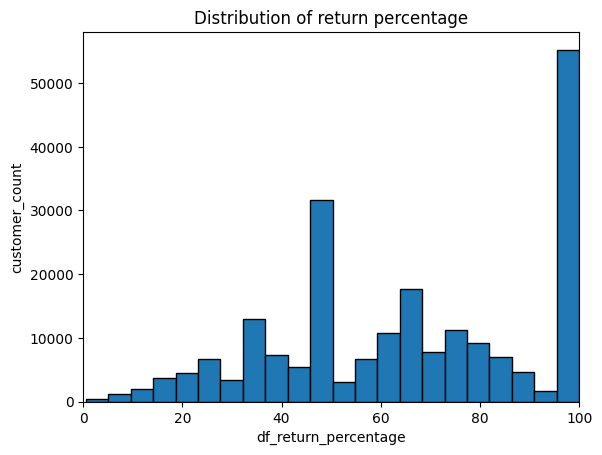

In [ ]:
# Histogram plot of return percentage (return percentage = 0 has been removed)

plt.hist(df_return_percentage[df_return_percentage['%return_quantity'] > 0]['%return_quantity'], bins = 22, edgecolor = 'black')
plt.title('Distribution of return percentage')
plt.xlabel('df_return_percentage')
plt.ylabel('customer_count')
plt.xlim(0,100)
plt.show()

#### Order placed vs return against each unique customer (Order count > Return Count)

In [ ]:
#to check total return quantity for each order ID
df_groupby_orderID = order_df.groupby(['customerID', 'orderID'])['returnQuantity'].sum().reset_index(name='total_return_quantity')
df_groupby_orderID

,customerID,orderID,total_return_quantity
0,c1000001,a1001465,0
1,c1000001,a1004977,1
2,c1000001,a1012517,0
3,c1000001,a1013536,2
4,c1000001,a1021517,1
...,...,...,...
738374,c1320877,a1618987,5
738375,c1320877,a1650034,0
738376,c1320877,a1664004,0
738377,c1320877,a1671225,0


In [ ]:
#filtered orderIDs where cutomer has returned entire or some of the ordered quantity
return_count = df_groupby_orderID[df_groupby_orderID['total_return_quantity']>0]
return_count

,customerID,orderID,total_return_quantity
1,c1000001,a1004977,1
3,c1000001,a1013536,2
4,c1000001,a1021517,1
5,c1000001,a1022902,1
6,c1000001,a1028928,2
...,...,...,...
738363,c1319524,a1301750,1
738364,c1319524,a1306130,5
738366,c1319524,a1659360,2
738371,c1320568,a1565553,2


In [ ]:
#to check how many times each customer has opted return
df_returnCount_eachCustomer = return_count.groupby('customerID')['orderID'].nunique().reset_index(name= 'unique_return_count')
df_returnCount_eachCustomer

,customerID,unique_return_count
0,c1000001,62
1,c1000002,8
2,c1000003,1
3,c1000004,3
4,c1000005,20
...,...,...
213651,c1319460,1
213652,c1319461,1
213653,c1319524,4
213654,c1320568,1


In [ ]:
# Order return summary for return orders:

order_return_summary = df_return_percentage.merge(df_returnCount_eachCustomer, on='customerID', how='inner')
order_return_summary = order_return_summary[['customerID', 'unique_order_count', 'orderQuantity', 'orderValue', 'unique_return_count', 'returnQuantity', 'returnValue', '%return_quantity', '%return_value'
]]
order_return_summary


,customerID,unique_order_count,orderQuantity,orderValue,unique_return_count,returnQuantity,returnValue,%return_quantity,%return_value
0,c1000001,90,186,5123.39,62,89,3008.96,47.85,58.73
1,c1000002,10,15,859.86,8,12,763.89,80.00,88.84
2,c1000003,1,5,175.97,1,2,55.00,40.00,31.26
3,c1000004,3,9,251.92,3,5,132.96,55.56,52.78
4,c1000005,26,88,3579.26,20,60,2493.49,68.18,69.66
...,...,...,...,...,...,...,...,...,...
213651,c1319460,1,10,474.91,1,5,249.95,50.00,52.63
213652,c1319461,1,8,479.93,1,6,409.94,75.00,85.42
213653,c1319524,6,15,388.94,4,9,265.97,60.00,68.38
213654,c1320568,1,4,71.96,1,2,35.98,50.00,50.00


In [ ]:
# check if order count >= return count (true in our case & thus validating the data)
sum(order_return_summary['unique_order_count'] >= order_return_summary['unique_return_count'])

213656

#### Check by product group if any group having max return

In [ ]:
def productGroup_groupby(order_df):

  # to group  by product category wise and check order & return quantity for each category
  df_groupby_productGroup = order_df.groupby('productGroup').agg({'quantity' : 'sum', 'returnQuantity' : 'sum', 'rrp':'sum', 'orderPrice': 'sum','articleID':'nunique'})
  df_groupby_productGroup['%return'] = round(((df_groupby_productGroup['returnQuantity'] / df_groupby_productGroup['quantity']) * 100),2)
  df_groupby_productGroup = df_groupby_productGroup[['quantity', 'returnQuantity', '%return', 'orderPrice', 'rrp', 'articleID']]
  df_groupby_productGroup = df_groupby_productGroup.rename(columns= {'articleID' : 'uniqueArticleID'})
  df_groupby_productGroup.reset_index()

  return df_groupby_productGroup


df_groupby_productGroup = productGroup_groupby(order_df)

df_groupby_productGroup

,quantity,returnQuantity,%return,orderPrice,rrp,uniqueArticleID
productGroup,,,,,,
1.0,203166,122460,60.28,9745528.69,11529925.43,405
2.0,203883,119212,58.47,11258172.34,12914080.40,506
3.0,900257,416263,46.24,21782378.95,24979729.31,964
4.0,115037,59900,52.07,3853290.69,5294703.10,166
5.0,82022,45078,54.96,3334887.12,4011654.20,140
6.0,37299,19316,51.79,1511150.06,1977178.79,91
7.0,40734,25924,63.64,4032440.88,4947993.60,100
8.0,324129,191380,59.04,10739502.32,13110833.87,378
9.0,73060,44193,60.49,3080468.52,3520223.97,152


Product group 43, 45 & 90 are having data quality issue as per our analysis. As all have zero rrp and price.



This generates follow-up question - Can RRP of any article be zero or does this indicate inapropriate data in our dataset?

while reviewing few research article, this was found that sometimes price of a product is set zero if the concerned product is newly launched in market and retailer wants to penetrate market fast.

We've referred a research paper from Springer. Link is as following -
https://link.springer.com/article/10.1007/s11747-022-00842-1

#### Check if Price > RRP

In [ ]:
#checked how many rows are there where price > rrp
order_df[order_df['perUnitPrice'] > order_df['rrp']]

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,perUnitPrice,orderPrice,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,returnPrice
15475,a1005203,2014-01-08,i1002094,1997,42,9.0,1,59.99,59.99,40.0,v1000078,10.0,c1052511,2,BPRG,1,59.99
15531,a1005221,2014-01-08,i1002094,1997,38,9.0,1,59.99,59.99,40.0,0,0.0,c1080158,4,BPRG,0,0.00
15575,a1005238,2014-01-08,i1002094,1997,44,9.0,1,59.99,59.99,40.0,v1000078,10.0,c1024416,2,BPRG,1,59.99
15651,a1005264,2014-01-08,i1002094,1997,42,9.0,1,59.99,59.99,40.0,0,0.0,c1079979,2,BPRG,1,59.99
15652,a1005264,2014-01-08,i1002094,1997,44,9.0,1,59.99,59.99,40.0,0,0.0,c1079979,2,BPRG,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256245,a1404436,2015-01-04,i1002209,1001,36,9.0,1,59.99,59.99,40.0,0,0.0,c1223170,2,BPRG,1,59.99
1256730,a1404592,2015-01-04,i1002209,1001,42,9.0,1,59.99,59.99,40.0,0,0.0,c1223224,3,BPRG,1,59.99
1256731,a1404592,2015-01-04,i1002209,1001,44,9.0,1,59.99,59.99,40.0,0,0.0,c1223224,3,BPRG,1,59.99
1257847,a1404979,2015-01-04,i1002209,1001,44,9.0,1,59.99,59.99,40.0,0,0.0,c1223346,2,BPRG,1,59.99


In [ ]:
# to check the return count when price > rrp.
order_df[(order_df['perUnitPrice'] > order_df['rrp']) & (order_df['returnQuantity'] > 0)]

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,perUnitPrice,orderPrice,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,returnPrice
15475,a1005203,2014-01-08,i1002094,1997,42,9.0,1,59.99,59.99,40.0,v1000078,10.0,c1052511,2,BPRG,1,59.99
15575,a1005238,2014-01-08,i1002094,1997,44,9.0,1,59.99,59.99,40.0,v1000078,10.0,c1024416,2,BPRG,1,59.99
15651,a1005264,2014-01-08,i1002094,1997,42,9.0,1,59.99,59.99,40.0,0,0.0,c1079979,2,BPRG,1,59.99
15690,a1005279,2014-01-08,i1002094,1997,40,9.0,1,59.99,59.99,40.0,v1000078,10.0,c1062022,2,BPRG,1,59.99
15820,a1005324,2014-01-08,i1002094,1997,36,9.0,1,59.99,59.99,40.0,0,0.0,c1090180,5,PAYPALVC,1,59.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256245,a1404436,2015-01-04,i1002209,1001,36,9.0,1,59.99,59.99,40.0,0,0.0,c1223170,2,BPRG,1,59.99
1256730,a1404592,2015-01-04,i1002209,1001,42,9.0,1,59.99,59.99,40.0,0,0.0,c1223224,3,BPRG,1,59.99
1256731,a1404592,2015-01-04,i1002209,1001,44,9.0,1,59.99,59.99,40.0,0,0.0,c1223224,3,BPRG,1,59.99
1257847,a1404979,2015-01-04,i1002209,1001,44,9.0,1,59.99,59.99,40.0,0,0.0,c1223346,2,BPRG,1,59.99


Here, return percentage is higher than average return. (average return %age = 52% and here it's 60%)
        That means , price > rrp may have impact on return.

In [ ]:
#Total count where price is 0
order_df[(order_df['orderPrice' and 'rrp']==0) & (order_df['quantity'] != 0)]

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,perUnitPrice,orderPrice,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,returnPrice
1699,a1000558,2014-01-02,i1003987,8888,A,45.0,1,0.0,0.0,0.0,v1000043,0.0,c1063489,2,CBA,0,0.0
3104,a1001083,2014-01-03,i1003987,8888,A,45.0,1,0.0,0.0,0.0,v1000043,0.0,c1089757,2,PAYPALVC,0,0.0
3924,a1001380,2014-01-03,i1003987,8888,A,45.0,1,0.0,0.0,0.0,v1000043,0.0,c1066907,3,BPRG,1,0.0
5437,a1001886,2014-01-04,i1003987,8888,A,45.0,1,0.0,0.0,0.0,v1000043,0.0,c1000885,2,BPRG,0,0.0
5848,a1002028,2014-01-04,i1003987,8888,A,45.0,1,0.0,0.0,0.0,v1000043,0.0,c1090188,2,BPRG,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324314,a1743945,2015-09-30,i1003995,8888,A,45.0,1,0.0,0.0,0.0,v1000795,0.0,c1155553,2,BPRG,0,0.0
2324338,a1743953,2015-09-30,i1003993,8888,A,45.0,1,0.0,0.0,0.0,v1000816,0.0,c1319398,2,BPRG,0,0.0
2324408,a1743983,2015-09-30,i1003995,8888,A,45.0,1,0.0,0.0,0.0,v1000795,0.0,c1225826,3,BPRG,0,0.0
2324630,a1744048,2015-09-30,i1003995,8888,A,45.0,1,0.0,0.0,0.0,v1000795,0.0,c1213657,3,BPRG,0,0.0


Here, 15200 items having 0 rrp and perunit price. so, Where rrp is 0 then per unit price is also 0.

as per above analysis , there are 31643 items are cancelled items since quantity for each is 0.

#### Analysis of rrp, voucherID and voucherAmount

In [ ]:
#checking rrp vs voucherID vs voucherAmount
order_df[(order_df['voucherID'] == '0') & (order_df['rrp'] == 0) & (order_df['voucherAmount'] == 0) & (order_df['perUnitPrice'] == 0)]


,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,perUnitPrice,orderPrice,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,returnPrice
206613,a1068700,2014-03-14,i1003985,8888,A,43.0,1,0.0,0.0,0.0,0,0.0,c1004259,2,PAYPALVC,1,0.0
274947,a1090958,2014-04-03,i1003985,8888,A,43.0,1,0.0,0.0,0.0,0,0.0,c1035300,2,BPRG,1,0.0
417424,a1136294,2014-05-13,i1003989,8888,A,45.0,1,0.0,0.0,0.0,0,0.0,c1055589,5,BPRG,0,0.0
505826,a1162716,2014-06-01,i1003989,8888,A,45.0,1,0.0,0.0,0.0,0,0.0,c1057114,2,BPRG,0,0.0
757686,a1238603,2014-07-31,i1003985,8888,A,43.0,1,0.0,0.0,0.0,0,0.0,c1064418,2,BPRG,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638543,a1530951,2015-04-20,i1003992,8888,A,45.0,1,0.0,0.0,0.0,0,0.0,c1012429,2,KKE,0,0.0
1638750,a1531017,2015-04-20,i1003992,8888,A,45.0,1,0.0,0.0,0.0,0,0.0,c1069423,2,BPRG,0,0.0
1638862,a1531052,2015-04-20,i1003992,8888,A,45.0,1,0.0,0.0,0.0,0,0.0,c1069867,2,BPRG,0,0.0
1728252,a1559330,2015-05-11,i1003996,8888,A,45.0,1,0.0,0.0,0.0,0,0.0,c1060165,2,VORAUS,0,0.0


In [ ]:
# check the voucherID for which voucher amount is 0.
order_df[(order_df['voucherID'] != '0') & (order_df['voucherAmount'] == 0)]

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,perUnitPrice,orderPrice,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,returnPrice
1697,a1000558,2014-01-02,i1000592,1001,44,3.0,1,39.99,39.99,39.99,v1000043,0.0,c1063489,2,CBA,0,0.0
1698,a1000558,2014-01-02,i1002012,1995,44,8.0,1,45.99,45.99,45.99,v1000043,0.0,c1063489,2,CBA,0,0.0
1699,a1000558,2014-01-02,i1003987,8888,A,45.0,1,0.00,0.00,0.00,v1000043,0.0,c1063489,2,CBA,0,0.0
3103,a1001083,2014-01-03,i1001496,2981,44,6.0,1,49.99,49.99,49.99,v1000043,0.0,c1089757,2,PAYPALVC,0,0.0
3104,a1001083,2014-01-03,i1003987,8888,A,45.0,1,0.00,0.00,0.00,v1000043,0.0,c1089757,2,PAYPALVC,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324734,a1744075,2015-09-30,i1001107,2001,40,3.0,1,5.00,5.00,15.99,v1000795,0.0,c1154132,5,CBA,0,0.0
2324735,a1744075,2015-09-30,i1001107,2085,42,3.0,1,5.00,5.00,15.99,v1000795,0.0,c1154132,5,CBA,0,0.0
2324736,a1744075,2015-09-30,i1002374,1003,44,13.0,1,18.00,18.00,59.99,v1000795,0.0,c1154132,5,CBA,0,0.0
2324738,a1744075,2015-09-30,i1003131,1091,44,3.0,1,20.00,20.00,39.99,v1000795,0.0,c1154132,5,CBA,0,0.0


In [ ]:
#to check where VoucherID is applied
sum(order_df['voucherID'] != '0')

449911

In [ ]:
#to check the return after applying voucherID
order_df[(order_df['voucherID']!= '0') & (order_df['returnQuantity']>0)]

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,perUnitPrice,orderPrice,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,returnPrice
47,a1000016,2014-01-01,i1000576,3978,44,3.0,1,25.00,25.00,29.99,v1000040,10.0,c1089300,2,BPRG,1,25.00
112,a1000042,2014-01-01,i1002011,1997,44,8.0,1,49.99,49.99,49.99,v1000040,10.0,c1089310,2,PAYPALVC,1,49.99
113,a1000042,2014-01-01,i1002013,1493,44,8.0,1,39.99,39.99,39.99,v1000040,10.0,c1089310,2,PAYPALVC,1,39.99
305,a1000115,2014-01-01,i1001484,2934,42,6.0,1,25.00,25.00,49.99,v1000040,10.0,c1073759,5,BPRG,1,25.00
306,a1000115,2014-01-01,i1001484,2934,44,6.0,1,25.00,25.00,49.99,v1000040,10.0,c1073759,5,BPRG,1,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325130,a1744169,2015-09-30,i1003178,1093,42,3.0,1,29.99,29.99,29.99,v1000415,10.0,c1268960,2,BPRG,1,29.99
2325131,a1744169,2015-09-30,i1003185,1114,42,3.0,1,29.99,29.99,29.99,v1000415,10.0,c1268960,2,BPRG,1,29.99
2325132,a1744169,2015-09-30,i1003185,1117,42,3.0,1,29.99,29.99,29.99,v1000415,10.0,c1268960,2,BPRG,1,29.99
2325133,a1744169,2015-09-30,i1003207,1096,42,3.0,1,29.99,29.99,29.99,v1000415,10.0,c1268960,2,BPRG,1,29.99


From above we can conclude that return percentage is not depending on voucher

#### Defining paymentMethod_groupby()

In [ ]:
def paymentMethod_groupby(order_df):

  df_groupby_paymentMethod = order_df.groupby('paymentMethod').agg({'quantity' : 'sum', 'returnQuantity' : 'sum', 'orderPrice': 'sum','returnPrice': 'sum', 'articleID': 'nunique'})
  df_groupby_paymentMethod['%return_quantity'] = round(df_groupby_paymentMethod['returnQuantity']/df_groupby_paymentMethod['quantity']*100,2)
  df_groupby_paymentMethod['%return_value'] = round(df_groupby_paymentMethod['returnPrice']/df_groupby_paymentMethod['orderPrice']*100,2)
  df_groupby_paymentMethod = df_groupby_paymentMethod.rename(columns= {'orderPrice' : 'orderValue', 'returnPrice' : 'returnValue'})
  df_groupby_paymentMethod.sort_values(by='%return_value', ascending= False).reset_index()

  return df_groupby_paymentMethod

In [ ]:
df_groupby_paymentMethod = paymentMethod_groupby(order_df)

#### Relation between payment type and return

<Axes: xlabel='paymentMethod', ylabel='%return_value'>

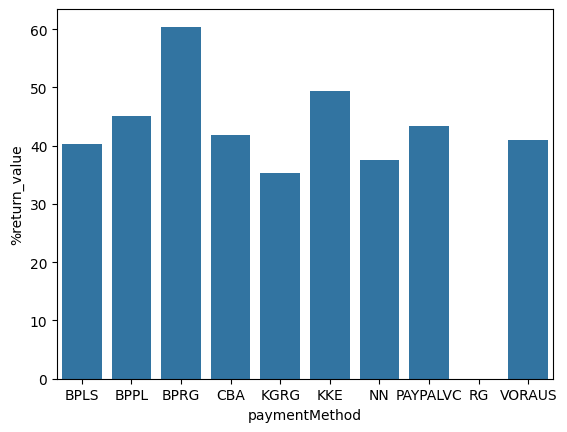

In [ ]:
sns.barplot(x = 'paymentMethod', y = '%return_value', data = df_groupby_paymentMethod.reset_index())

Conclusion: Here we observed that return %age among different payment methods are almost uniform.

- Introduce new or repeated customer details in return through recency checking

#### Automated Data Profiling

In [ ]:
prof = ProfileReport(order_df)
prof.to_file(output_file='output.html')

NameError: name 'ProfileReport' is not defined

## Data Visualization

### Time Trends (return %age vs order date)

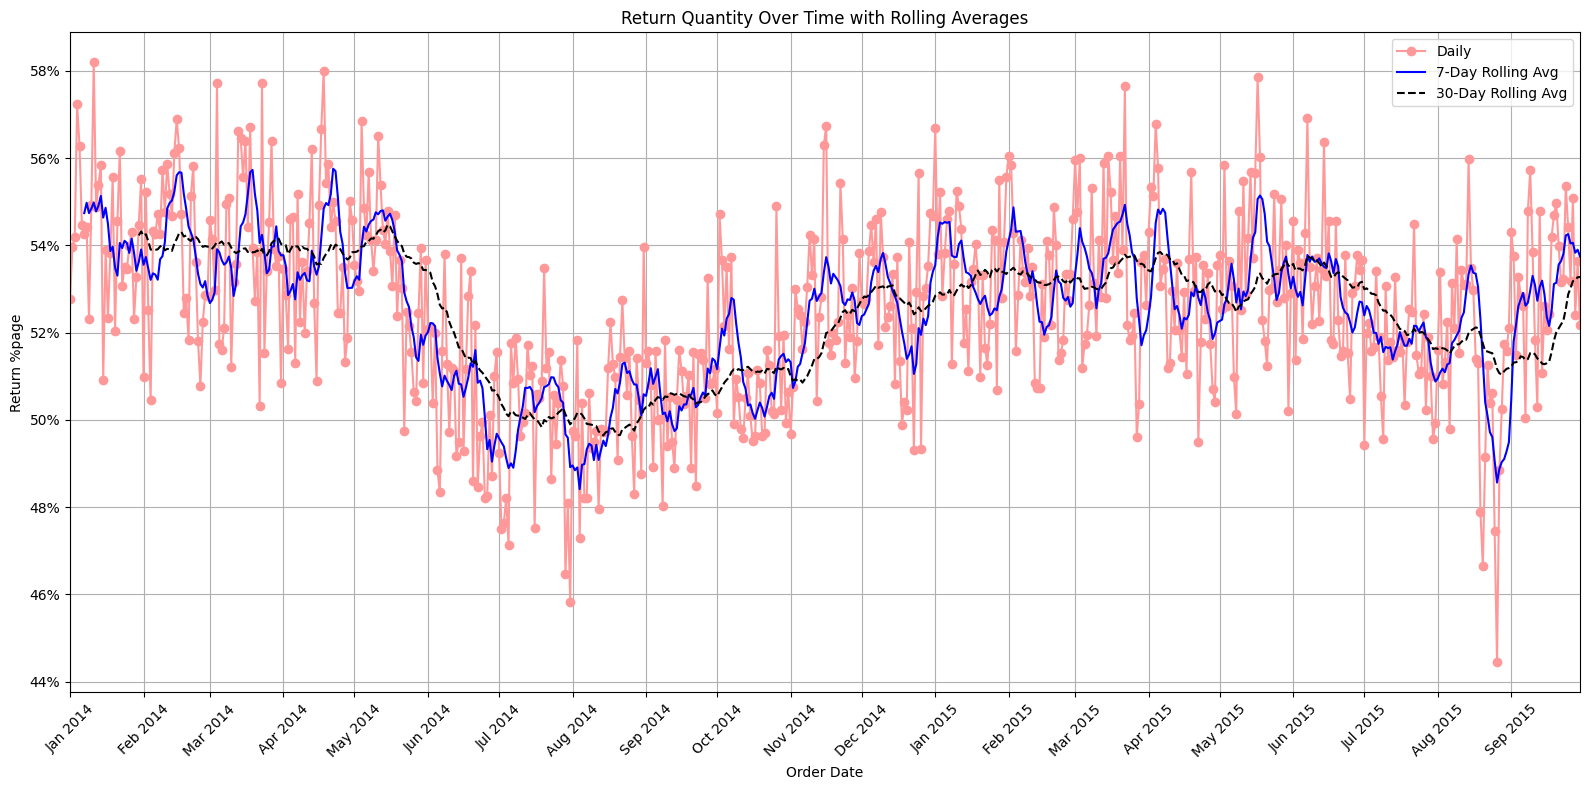

In [ ]:
return_over_time = order_df.groupby('orderDate')['returnQuantity'].sum()

# Calculate return percentage
total_quantity_over_time = order_df.groupby('orderDate')['quantity'].sum()
return_percentage_over_time = (return_over_time / total_quantity_over_time)

# Calculate 7-day and 30-day rolling averages
rolling_7d = return_percentage_over_time.rolling(window=7).mean()
rolling_30d = return_percentage_over_time.rolling(window=30).mean()

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(return_percentage_over_time, marker='o', linestyle='-', color=(1.0, 0.6, 0.6), label='Daily')
plt.plot(rolling_7d, linestyle='-', color='blue', label='7-Day Rolling Avg')
plt.plot(rolling_30d, linestyle='--', color='black', label='30-Day Rolling Avg')

# Set major ticks to be at the beginning of each month
month_locator = MonthLocator()
month_format = DateFormatter("%b %Y")
plt.gca().xaxis.set_major_locator(month_locator)
plt.gca().xaxis.set_major_formatter(month_format)

# Set x-axis limits to cover the entire data range
plt.xlim(return_percentage_over_time.index.min(), return_percentage_over_time.index.max())

# to set y-axis as in %age format
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.title('Return Quantity Over Time with Rolling Averages')
plt.xlabel('Order Date')
plt.ylabel('Return %page')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)  # Add a grid
plt.tight_layout()
plt.show()

Conclusion- Here we can clearly see that there is some pattern in weekly chart.

### Return percentage vs Categorical variables (colorCode, SizeCode, productGroup, PaymentMethod)

<ipython-input-53-60ae3474693a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_return_percentage_val.index, y=df_return_percentage_val, ax=axes[i], palette='viridis')
<ipython-input-53-60ae3474693a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_return_percentage_val.index, y=df_return_percentage_val, ax=axes[i], palette='viridis')
<ipython-input-53-60ae3474693a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_return_percentage_val.index, y=df_return_percentage_val, ax=axes[i], palette='viridis')
<ipython-input-53-60ae

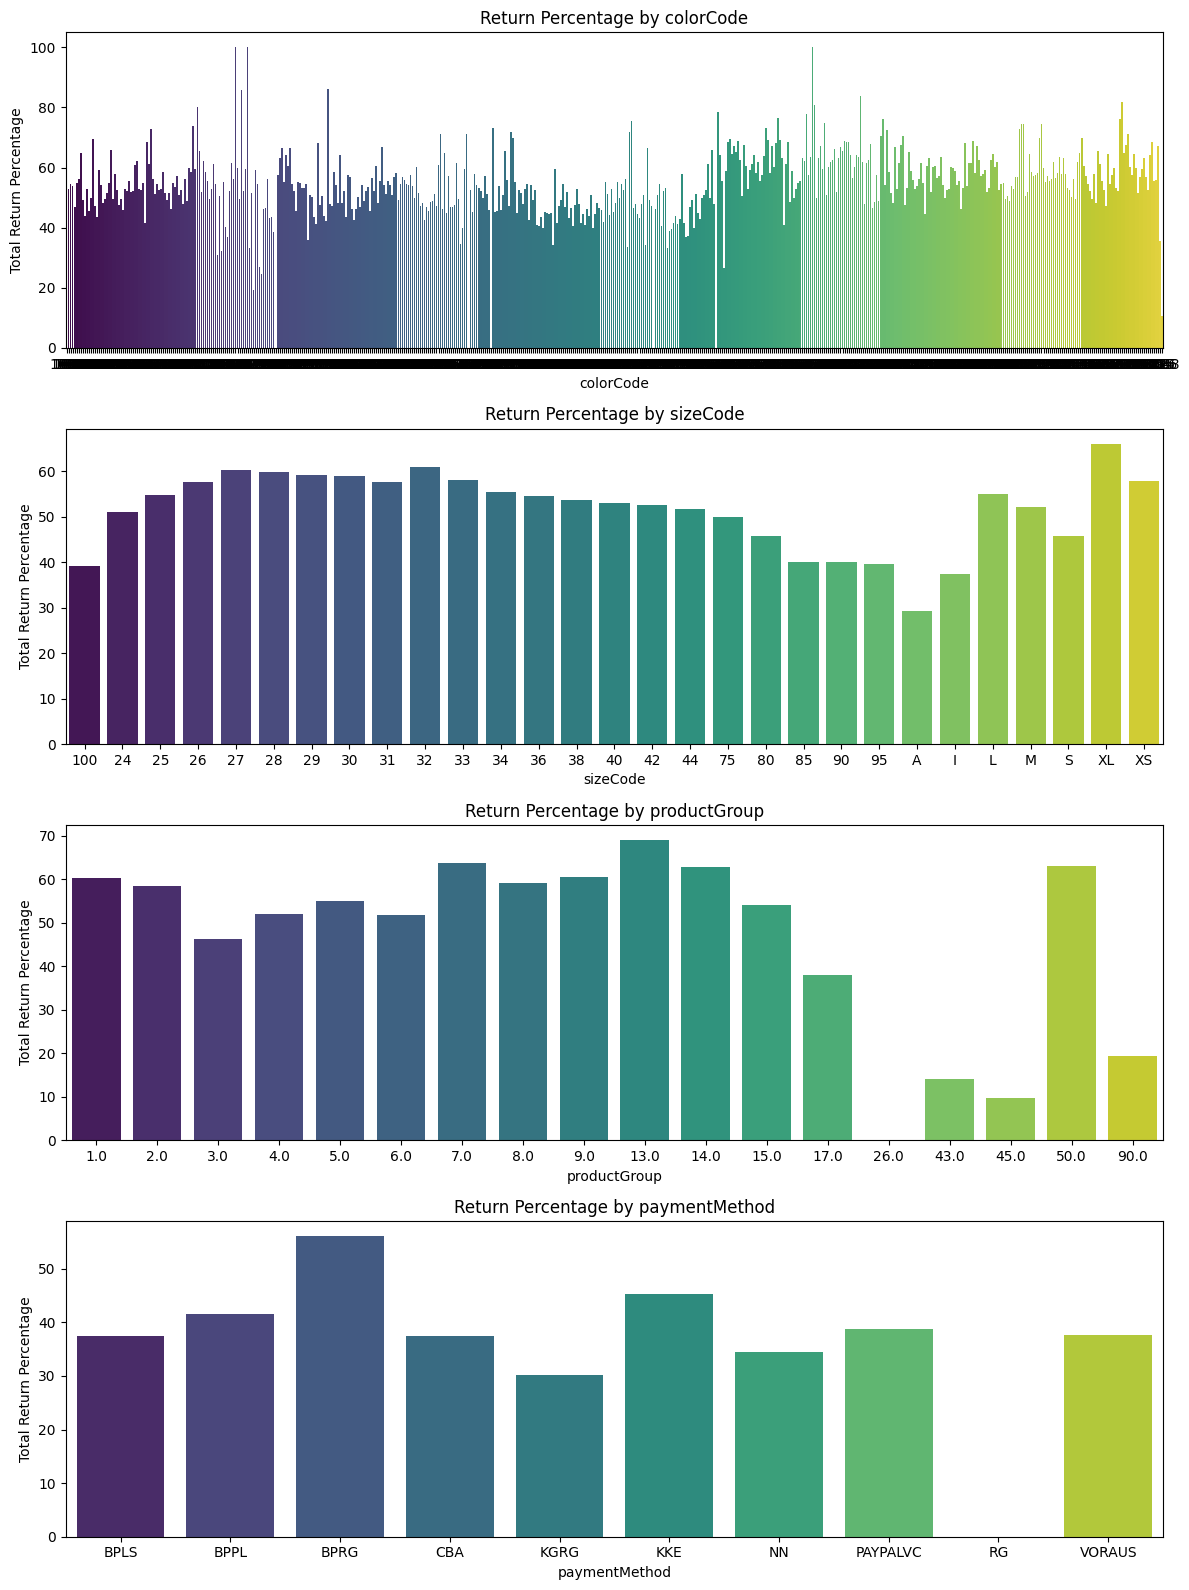

In [ ]:

# Categorical features
categorical_features = ['colorCode', 'sizeCode', 'productGroup', 'paymentMethod']

# Create subplots for each categorical feature
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(12, 4 * len(categorical_features)))

# Iterate through each categorical feature
for i, feature in enumerate(categorical_features):
    # Calculate return percentage for each category
    df_return_percentage_val = (order_df.groupby(feature)['returnQuantity'].sum() / order_df.groupby(feature)['quantity'].sum()) * 100

    # Plot bar plot
    sns.barplot(x=df_return_percentage_val.index, y=df_return_percentage_val, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Return Percentage by {feature}')
    axes[i].set_ylabel('Total Return Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

In above correlation matrix, we found that features are independent except rrp and price.

## Feature_Engineering

### Outlier Detection

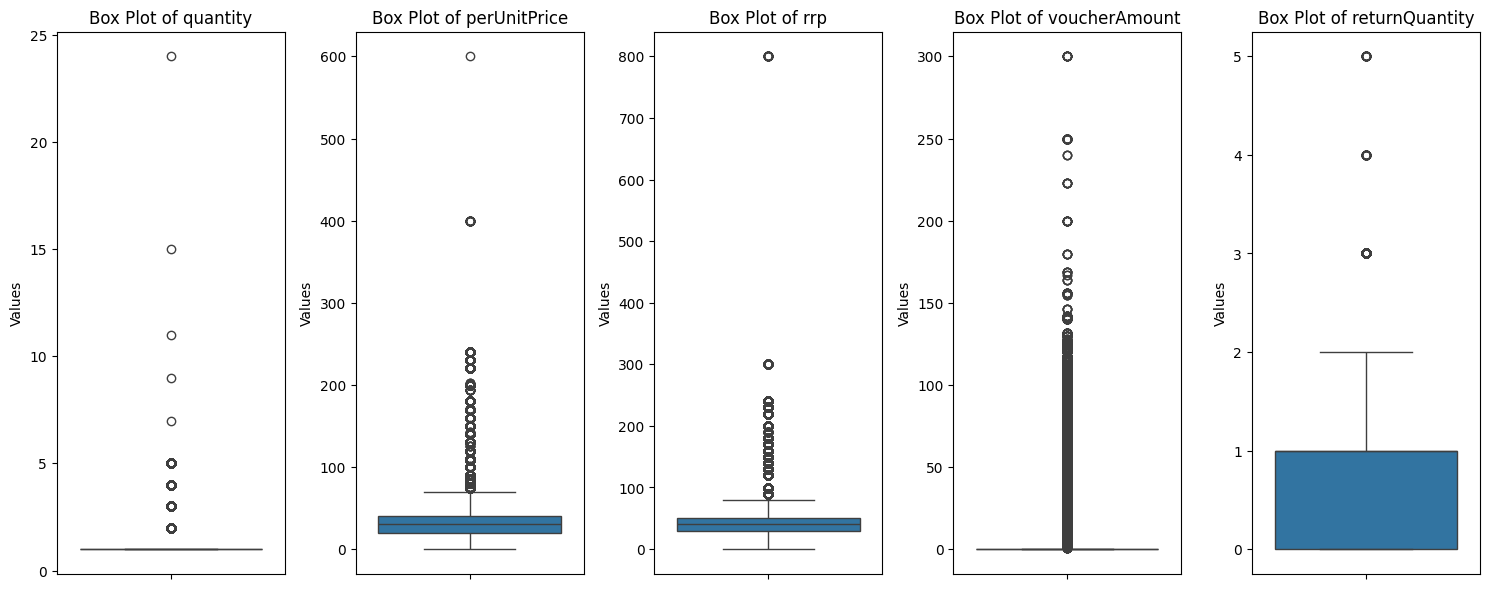

In [ ]:
# Plotting Box Plot for the required features to check the outliers

# Select relevant columns from your DataFrame
selected_features = ['quantity', 'perUnitPrice', 'rrp', 'voucherAmount', 'returnQuantity']
selected_data = order_df[selected_features]

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(selected_features), figsize=(15, 6))

# Create box plots for each feature
for i, feature in enumerate(selected_features):
    sns.boxplot(y=selected_data[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Customer Level Features

#### Recency, Frequency, Monetary Value - Defining caluculate_RFM_metrics()

In [ ]:

def calculate_RFM_metrics(order_df):

  df_customer_groupby = order_df.groupby('customerID')
  df_RFM = df_customer_groupby.agg(
    firstDate=('orderDate', np.min),
    recentDate=('orderDate', np.max),
    frequency=('orderID', 'nunique'),
    orderValue=('orderPrice', 'sum'),
    returnValue=('returnPrice', 'sum'),
).reset_index()

  last_3_months_threshold = order_df['orderDate'].max() - pd.DateOffset(months=3)
  order_date_copy = order_df[['customerID', 'orderDate']].copy()  # Explicitly create a copy
  order_date_copy['recency'] = (order_date_copy['orderDate'].max() - order_date_copy['orderDate']).dt.days + 1
  recent_orders = order_date_copy[order_date_copy['orderDate'] > last_3_months_threshold]
  recent_group_by_customer = recent_orders.groupby('customerID')['recency'].mean().reset_index()
  order_date_copy_filtered = order_date_copy[~order_date_copy['customerID'].isin(recent_group_by_customer['customerID'])]
  remaining_group_by_customer = order_date_copy_filtered.groupby('customerID')['recency'].min().reset_index()
  result_recency_df = pd.concat([recent_group_by_customer, remaining_group_by_customer], axis=0, ignore_index=True)


  df_RFM = pd.merge(df_RFM, result_recency_df, on='customerID', how='inner')

  # Adding each customer duration
  df_RFM['customerDuration'] = df_RFM['recentDate'] - df_RFM['firstDate']

  # Calculating monetary value for each customer
  df_RFM['monetary'] = df_RFM['orderValue'] - df_RFM['returnValue']

  # Selecting relevant columns
  df_RFM = df_RFM[['customerID', 'recency', 'frequency', 'monetary']]


  return df_RFM

In [ ]:
df_RFM = calculate_RFM_metrics(order_df)

In [ ]:
# The complete code is written above in customer groupby dataframe section:
df_customer_features = df_return_percentage.merge(df_RFM, on= 'customerID', how='inner')
df_customer_features

,customerID,unique_order_count,orderQuantity,orderValue,averageOrderValue,returnQuantity,returnValue,%return_quantity,%return_value,preferred_payment,recency,frequency,monetary
0,c1000001,90,186,5123.39,56.93,89,3008.96,47.85,58.73,BPRG,49.000000,90,2114.43
1,c1000002,10,15,859.86,85.99,12,763.89,80.00,88.84,BPRG,328.000000,10,95.97
2,c1000003,1,5,175.97,175.97,2,55.00,40.00,31.26,BPRG,337.000000,1,120.97
3,c1000004,3,9,251.92,83.97,5,132.96,55.56,52.78,BPRG,78.428571,3,118.96
4,c1000005,26,88,3579.26,137.66,60,2493.49,68.18,69.66,BPRG,31.000000,26,1085.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311160,c1319615,1,1,59.99,59.99,0,0.00,0.00,0.00,BPRG,497.000000,1,59.99
311161,c1319850,1,1,30.00,30.00,0,0.00,0.00,0.00,CBA,1.000000,1,30.00
311162,c1320021,2,2,109.98,54.99,0,0.00,0.00,0.00,PAYPALVC,6.000000,2,109.98
311163,c1320568,1,4,71.96,71.96,2,35.98,50.00,50.00,PAYPALVC,139.000000,1,35.98


In [ ]:
df_customer_features.columns

Index(['customerID', 'unique_order_count', 'orderQuantity', 'orderValue',
       'averageOrderValue', 'returnQuantity', 'returnValue',
       '%return_quantity', '%return_value', 'preferred_payment', 'recency',
       'frequency', 'monetary'],
      dtype='object')

### Order Level Features

In [ ]:
def OrderLevelFeature(order_df):

  # Here we crate features at order level to build model.

  df_groupby_order = order_df.groupby('orderID')
  df_order_features = df_groupby_order.agg({'orderPrice':'sum', 'articleID' : 'nunique', 'quantity': 'sum', 'returnQuantity':'sum', 'returnPrice': 'sum'}).reset_index()

  #calculating additional columns
  df_order_features['averagePerOrderValue'] = df_order_features['orderPrice']/df_order_features['quantity']
  df_order_features['%returnValuePerOrder'] = round((df_order_features['returnPrice']/df_order_features['orderPrice'] * 100),2)
  df_order_features['%returnQuantityPerOrder'] = round((df_order_features['returnQuantity']/df_order_features['quantity'] * 100),2)

  # rename articleID to
  df_order_features = df_order_features.rename(columns = {'articleID': 'uniqueArticleCount', 'orderPrice' : 'orderValue'})

  # rearrange the columns
  df_order_features = df_order_features[['orderID', 'uniqueArticleCount', 'quantity', 'returnQuantity', 'averagePerOrderValue', 'orderValue', 'returnPrice', '%returnValuePerOrder', '%returnQuantityPerOrder']]

  # Renaming the columns of df_order_features so that we can merge them with main data frame (column name will not duplicate)

  new_columns = []
  for element in df_order_features.columns:
    if element != 'orderID':
      element = 'O_'+ element
      new_columns.append(element)
    else:
      new_columns.append(element)

  df_order_features.columns = new_columns

  return df_order_features


In [ ]:
df_order_features = OrderLevelFeature(order_df)
df_order_features.columns

Index(['orderID', 'O_uniqueArticleCount', 'O_quantity', 'O_returnQuantity',
       'O_averagePerOrderValue', 'O_orderValue', 'O_returnPrice',
       'O_%returnValuePerOrder', 'O_%returnQuantityPerOrder'],
      dtype='object')

In [ ]:
# to check return agaist each order level
df_order_features[df_order_features['O_returnQuantity']>0]

,orderID,O_uniqueArticleCount,O_quantity,O_returnQuantity,O_averagePerOrderValue,O_orderValue,O_returnPrice,O_%returnValuePerOrder,O_%returnQuantityPerOrder
1,a1000002,2,2,1,42.495000,84.99,49.99,58.82,50.00
3,a1000004,1,1,1,89.990000,89.99,89.99,100.00,100.00
4,a1000005,2,3,3,11.666667,35.00,35.00,100.00,100.00
6,a1000007,3,3,2,16.666667,50.00,35.00,70.00,66.67
7,a1000008,1,1,1,110.000000,110.00,110.00,100.00,100.00
...,...,...,...,...,...,...,...,...,...
738370,a1744171,8,8,6,59.991250,479.93,409.94,85.42,75.00
738371,a1744172,6,6,1,16.333333,98.00,15.00,15.31,16.67
738372,a1744173,2,2,1,64.990000,129.98,39.99,30.77,50.00
738373,a1744174,2,3,1,53.323333,159.97,59.99,37.50,33.33


### Article level Features

In [ ]:
order_df.columns

Index(['orderID', 'orderDate', 'articleID', 'colorCode', 'sizeCode',
       'productGroup', 'quantity', 'perUnitPrice', 'orderPrice', 'rrp',
       'voucherID', 'voucherAmount', 'customerID', 'deviceID', 'paymentMethod',
       'returnQuantity', 'returnPrice'],
      dtype='object')

Check unique articles

In [ ]:
article_color_size_df = order_df[[ 'articleID','colorCode', 'sizeCode','productGroup']].drop_duplicates()
article_color_size_df

,articleID,colorCode,sizeCode,productGroup
0,i1000382,1972,44,3.0
1,i1000550,3854,44,3.0
2,i1001991,2974,38,8.0
3,i1001999,1992,38,8.0
4,i1001942,1968,42,8.0
...,...,...,...,...
2324912,i1003185,1117,36,3.0
2324932,i1003685,7216,29,2.0
2324958,i1001156,1109,38,4.0
2324965,i1001477,2001,38,6.0


In [ ]:
df_article_features = order_df.groupby(['articleID', 'colorCode', 'sizeCode', 'productGroup']).agg({
    'perUnitPrice': 'mean',
    'returnQuantity': 'count'
}).reset_index()
df_article_features

,articleID,colorCode,sizeCode,productGroup,perUnitPrice,returnQuantity
0,i1000003,1974,32,1.0,20.0,1
1,i1000005,1956,32,1.0,10.0,1
2,i1000006,1971,34,1.0,20.0,1
3,i1000007,1735,42,1.0,20.0,1
4,i1000007,1971,34,1.0,20.0,1
...,...,...,...,...,...,...
53080,i1003994,8888,A,45.0,0.0,1333
53081,i1003995,8888,A,45.0,0.0,648
53082,i1003996,8888,A,45.0,0.0,2171
53083,i1003997,8888,A,45.0,0.0,218


In [ ]:
df_article_features[df_article_features['returnQuantity'] < 5]

,articleID,colorCode,sizeCode,productGroup,perUnitPrice,returnQuantity
0,i1000003,1974,32,1.0,20.000,1
1,i1000005,1956,32,1.0,10.000,1
2,i1000006,1971,34,1.0,20.000,1
3,i1000007,1735,42,1.0,20.000,1
4,i1000007,1971,34,1.0,20.000,1
...,...,...,...,...,...,...
52992,i1003971,3975,32,1.0,12.000,3
53013,i1003974,1001,32,1.0,49.990,4
53027,i1003976,2001,32,1.0,44.495,4
53034,i1003977,1001,32,1.0,29.990,4


Observations - same articleID having different color and size (unique article id = 3822, unique colorcode = 546, unique sizecode = 29)
whereas the unique combination of all these are 53135.

One of our approach is to take th unique combination of all these three as a feature.
But the problem is that, if the test data has no same unique combination (which is highly probable) then the prediction will be incorrect...

Question - How to handle this...?

##Decision Tree

In [ ]:
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


def train_decision_tree(X, y, test_size=0.2, random_state=None, param_grid=None, cv=5):
    """
    Train a decision tree classifier using the given features (X) and labels (y),
    performing hyperparameter tuning with grid search, and evaluate its performance.

    Parameters:
    - X: Features
    - y: Labels
    - test_size: The proportion of the dataset to include in the test split
    - random_state: Seed used by the random number generator
    - param_grid: Dictionary specifying the hyperparameter grid for grid search
    - cv: Number of folds for cross-validation

    Returns:
    - Trained decision tree classifier model with optimized hyperparameters
    - Predicted values
    - Dictionary containing evaluation metrics (accuracy, precision, recall, f1-score)
    """
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Compute class weights to handle class imbalance
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))

    # Initialize decision tree classifier
    dt_classifier = DecisionTreeClassifier(class_weight=class_weight_dict)

    # Perform grid search for hyperparameter tuning
    grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best estimator from grid search
    best_dt_classifier = grid_search.best_estimator_

    # Print the best hyperparameters found
    print("Best Hyperparameters:", grid_search.best_params_)

    # Train the decision tree classifier with the best hyperparameters
    best_dt_classifier.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = best_dt_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store evaluation metrics in a dictionary
    eval_metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1
    }

    # Return the trained model, predicted values, and evaluation metrics
    return best_dt_classifier, y_pred, eval_metrics

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X, y, test_size=0.2, random_state=None, param_grid=None, cv=5):
    """
    Train a random forest classifier using the given features (X) and labels (y),
    performing hyperparameter tuning with grid search, and evaluate its performance.

    Parameters:
    - X: Features
    - y: Labels
    - test_size: The proportion of the dataset to include in the test split
    - random_state: Seed used by the random number generator
    - param_grid: Dictionary specifying the hyperparameter grid for grid search
    - cv: Number of folds for cross-validation

    Returns:
    - Trained random forest classifier model with optimized hyperparameters
    - Predicted values
    - Dictionary containing evaluation metrics (accuracy, precision, recall, f1-score)
    """
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Compute class weights to handle class imbalance
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))

    # Initialize random forest classifier
    rf_classifier = RandomForestClassifier(class_weight=class_weight_dict)

    # Perform grid search for hyperparameter tuning
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best estimator from grid search
    best_rf_classifier = grid_search.best_estimator_

    # Print the best hyperparameters found
    print("Best Hyperparameters:", grid_search.best_params_)

    # Train the random forest classifier with the best hyperparameters
    best_rf_classifier.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = best_rf_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store evaluation metrics in a dictionary
    eval_metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1
    }

    # Return the trained model, predicted values, and evaluation metrics
    return best_rf_classifier, y_pred, eval_metrics


##XgBoost

In [56]:
import xgboost as xgb

def train_xgboost(X, y, test_size=0.2, random_state=None, param_grid=None, cv=5):
    """
    Train an XGBoost classifier using the given features (X) and labels (y),
    performing hyperparameter tuning with grid search, and evaluate its performance.

    Parameters:
    - X: Features
    - y: Labels
    - test_size: The proportion of the dataset to include in the test split
    - random_state: Seed used by the random number generator
    - param_grid: Dictionary specifying the hyperparameter grid for grid search
    - cv: Number of folds for cross-validation

    Returns:
    - Trained XGBoost classifier model with optimized hyperparameters
    - Predicted values
    - Dictionary containing evaluation metrics (accuracy, precision, recall, f1-score)
    """
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Compute class weights to handle class imbalance
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))

    # Initialize XGBoost classifier
    xgb_classifier = xgb.XGBClassifier(class_weight=class_weight_dict)

    # Perform grid search for hyperparameter tuning
    grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best estimator from grid search
    best_xgb_classifier = grid_search.best_estimator_

    # Print the best hyperparameters found
    print("Best Hyperparameters:", grid_search.best_params_)

    # Train the XGBoost classifier with the best hyperparameters
    best_xgb_classifier.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = best_xgb_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store evaluation metrics in a dictionary
    eval_metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1
    }

    # Return the trained model, predicted values, and evaluation metrics
    return best_xgb_classifier, y_pred, eval_metrics


In [58]:

def train_simple_xgboost(X, y, test_size=0.2, random_state=None):
    """
    Train an XGBoost classifier using the given features (X) and labels (y)
    with default hyperparameters, and evaluate its performance.

    Parameters:
    - X: Features
    - y: Labels
    - test_size: The proportion of the dataset to include in the test split
    - random_state: Seed used by the random number generator

    Returns:
    - Trained XGBoost classifier model
    - Predicted values
    - Dictionary containing evaluation metrics (accuracy, precision, recall, f1-score)
    """
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Compute class weights to handle class imbalance
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))

    # Initialize XGBoost classifier with default hyperparameters
    xgb_classifier = xgb.XGBClassifier(class_weight=class_weight_dict)

    # Train the XGBoost classifier
    xgb_classifier.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = xgb_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store evaluation metrics in a dictionary
    eval_metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1
    }

    # Return the trained model, predicted values, and evaluation metrics
    return xgb_classifier, y_pred, eval_metrics


## Model - Customer Level

In [ ]:
X_customer = df_customer_features[['orderValue', 'averageOrderValue', 'recency', 'frequency','returnQuantity']]
X_customer['target'] = X_customer['returnQuantity'].apply(lambda x: 0 if x == 0 else 1)
y_customer = X_customer['target']
X_customer = X_customer.drop(['target','returnQuantity'], axis=1)

<ipython-input-69-87475c5b15f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_customer['target'] = X_customer['returnQuantity'].apply(lambda x: 0 if x == 0 else 1)


Check class imbalance

In [ ]:
y_customer.value_counts(normalize=True) * 100

1    68.663249
0    31.336751
Name: target, dtype: float64

In [ ]:
#X_customer = pd.read_csv('X_customer.csv')
#y_customer = pd.read_csv('y_customer.csv'#)

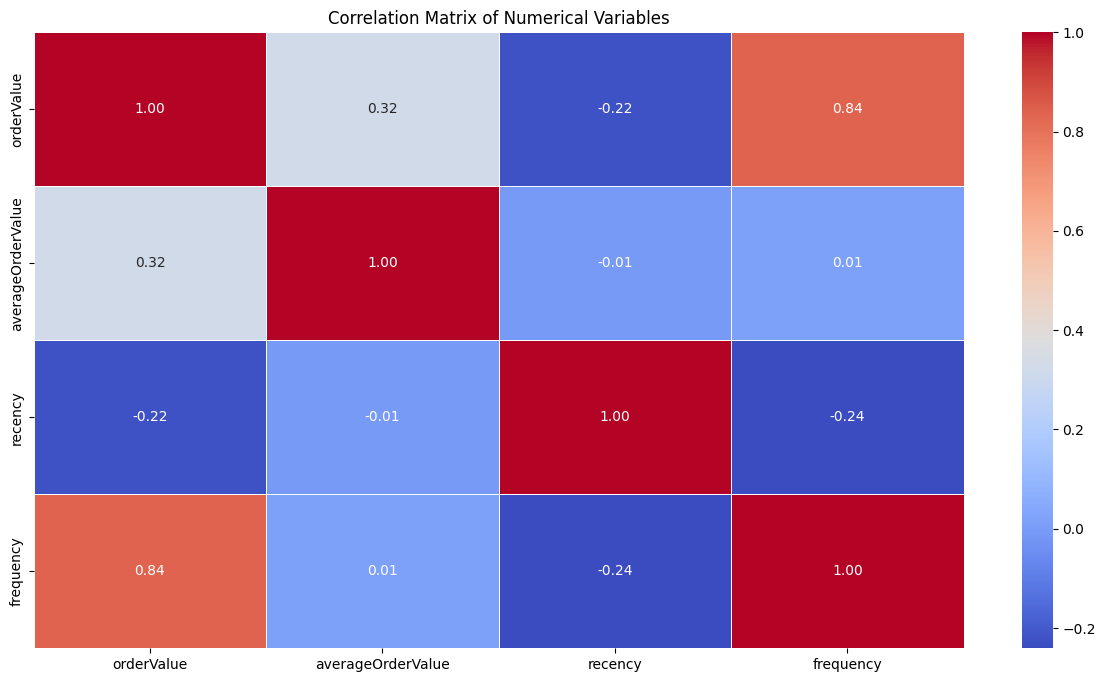

In [ ]:
# Create a correlation matrix
correlation_matrix = df_customer_features[['orderValue', 'averageOrderValue', 'recency', 'frequency']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Feature Scaling for mitigating outliers

In [ ]:
from sklearn.preprocessing import RobustScaler
# Initialize RobustScaler
scaler = RobustScaler()

# Scale the features using RobustScaler
X_scaled = scaler.fit_transform(X_customer)

Decsion Tree with hyperparamter tunning

In [ ]:
# Define the hyperparameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'splitter': ['best', 'random']
}

trained_model, y_pred, eval_metrics = train_decision_tree(X_scaled, y_customer, test_size=0.2, random_state=42, param_grid=param_grid)

# Print evaluation metrics
print("Evaluation Metrics:")
for metric, value in eval_metrics.items():
    print(f"{metric}: {value}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Evaluation Metrics:
accuracy: 0.7547281988655536
precision: 0.8756363238272483
recall: 0.7490284215947933
f1-score: 0.8073991823550194


Random Forest with hyperparamter tunning

In [ ]:
# Define hyperparameter grids for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Execute Random Forest classifier
best_rf_classifier, rf_y_pred, rf_eval_metrics = train_random_forest(X_scaled, y_customer, test_size=0.2, random_state=42, param_grid=rf_param_grid, cv=5)

# Print evaluation metrics for Random Forest
print("Random Forest Evaluation Metrics:")
for metric, value in rf_eval_metrics.items():
    print(f"{metric}: {value}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Evaluation Metrics:
accuracy: 0.7502932527758585
precision: 0.8793555952646862
recall: 0.7373460692044763
f1-score: 0.8021138418438813


XgBoost with hyperparamter tunning

In [ ]:
# Define hyperparameter grids for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# Execute XGBoost classifier
best_xgb_classifier, xgb_y_pred, xgb_eval_metrics = train_xgboost(X_scaled, y_customer, test_size=0.2, random_state=42, param_grid=xgb_param_grid, cv=5)

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
for metric, value in xgb_eval_metrics.items():
    print(f"{metric}: {value}")


## Model - Order Level

In [ ]:
X_order = df_order_features[['O_uniqueArticleCount', 'O_averagePerOrderValue', 'O_orderValue','O_returnQuantity']]
X_order['target'] = X_order['O_returnQuantity'].apply(lambda x: 0 if x == 0 else 1)
y_order = X_order['target']
X_order = X_order.drop(['target','O_returnQuantity'], axis=1)

Checking class Imbalance

In [ ]:
X_order = pd.read_csv('/content/X_order.csv')
y_order = pd.read_csv('/content/y_order.csv')

In [ ]:
y_order.value_counts(normalize=True) * 100

target
1         63.538373
0         36.461627
dtype: float64

In [ ]:
#X_order.to_csv('X_order.csv', index=False)
#y_order.to_csv('y_order.csv', index=False)

In [ ]:
# Create a correlation matrix
correlation_matrix = df_order_features[['O_uniqueArticleCount', 'O_averagePerOrderValue', 'O_orderValue']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Data Scaling

In [ ]:
# Initialize RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Scale the features using RobustScaler
X_scaled_order = scaler.fit_transform(X_order)


Decsion tree with hyperparamter tunning

In [ ]:
# Define the hyperparameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'splitter': ['best', 'random']
}


trained_model2, y_pred2, eval_metrics2 = train_decision_tree(X_scaled_order, y_order, test_size=0.2, random_state=42, param_grid=param_grid)

# Print evaluation metrics
print("Evaluation Metrics:")
for metric, value in eval_metrics2.items():
    print(f"{metric}: {value}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Evaluation Metrics:
accuracy: 0.6965789972642813
precision: 0.8446030606354972
recall: 0.6398366093235072
f1-score: 0.7280968967316771


Random Forest with hyperparamter tunning

In [ ]:
# Define hyperparameter grids for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Execute Random Forest classifier
best_rf_classifier2, rf_y_pred2, rf_eval_metrics2 = train_random_forest(X_scaled_order, y_order, test_size=0.2, random_state=42, param_grid=rf_param_grid, cv=5)

# Print evaluation metrics for Random Forest
print("Random Forest Evaluation Metrics:")
for metric, value in rf_eval_metrics.items():
    print(f"{metric}: {value}")

XgBoost with hyperparamter tunning

In [ ]:
# Define hyperparameter grids for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# Execute XGBoost classifier
best_xgb_classifier2, xgb_y_pred2, xgb_eval_metrics2 = train_xgboost(X_scaled_order, y_order, test_size=0.2, random_state=42, param_grid=None, cv=5)

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
for metric, value in xgb_eval_metrics.items():
    print(f"{metric}: {value}")


# Creating Master Data Set

In [ ]:
df_master_data = order_df.merge(df_customer_features, on = 'customerID', how = 'inner')
df_master_data = df_master_data.merge(df_order_features, on = 'orderID', how = 'inner')

df_master_data['target'] = df_master_data.apply(lambda row: 0 if row['returnQuantity_x'] == 0 else 1, axis =1)
df_master_data['voucher'] = df_master_data.apply(lambda row: 0 if row['voucherAmount'] == 0 else 1, axis =1)
df_master_data['paymentCode'], payment_methods = pd.factorize(df_master_data['paymentMethod'])
df_master_data['size'], size_methods = pd.factorize(df_master_data['sizeCode'])

df_master_data = df_master_data[['colorCode', 'productGroup', 'quantity', 'perUnitPrice', 'rrp', 'orderQuantity', 'orderValue', 'recency', 'frequency', 'O_uniqueArticleCount', 'O_quantity', 'O_orderValue', 'target', 'voucher', 'paymentCode', 'size']]
df_master_data

In [ ]:
# Select relevant columns from your DataFrame
selected_features = ['quantity', 'perUnitPrice', 'rrp', 'orderValue', 'recency', 'frequency']
selected_data = df_master_data[selected_features]

# Set up the figure and axis
plt.figure(figsize=(12, 8))
sns.boxplot(data=selected_data, palette='Set2')

# Customize the plot
plt.title('Box Plot of Numerical Features')
plt.ylabel('Values')

# Show the plot
plt.show()



In [ ]:
# Specify columns to transform
columns_to_transform = ['perUnitPrice', 'rrp', 'orderValue', 'recency', 'frequency']

# Add a small constant value to handle zero values
small_constant = 1e-5
df_master_data[columns_to_transform] = np.log1p(df_master_data[columns_to_transform] + small_constant)

In [ ]:
# Save a csv file for master data

#df_master_data.to_csv('master_data_transformed.csv', index=False)

### Importing test data & creating new dataFrame for the same.

In [ ]:
df_master_data = pd.read_csv('/content/df_master_data.csv')
df_master_data

,colorCode,productGroup,quantity,perUnitPrice,rrp,orderQuantity,orderValue,recency,frequency,O_uniqueArticleCount,O_quantity,O_orderValue,target,voucher,paymentCode,size
0,1972,3.0,1,10.00,29.99,4,57.00,492.0,2,2,2,30.00,0,0,0,0
1,3854,3.0,1,20.00,39.99,4,57.00,492.0,2,2,2,30.00,0,0,0,0
2,3974,3.0,1,9.00,29.99,4,57.00,492.0,2,2,2,27.00,0,0,0,0
3,1894,3.0,1,18.00,35.99,4,57.00,492.0,2,2,2,27.00,0,0,0,0
4,2974,8.0,1,35.00,49.99,2,84.99,638.0,1,2,2,84.99,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324807,1092,9.0,0,0.00,59.99,2,129.98,1.0,1,3,2,129.98,0,0,0,1
2324808,1082,3.0,1,39.99,39.99,2,129.98,1.0,1,3,2,129.98,1,0,0,1
2324809,2493,8.0,1,39.99,39.99,3,159.97,1.0,1,2,3,159.97,0,0,0,2
2324810,3001,1.0,1,59.99,59.99,3,159.97,1.0,1,2,3,159.97,1,0,0,2


In [ ]:
X = df_master_data[['productGroup', 'quantity', 'perUnitPrice', 'rrp', 'orderValue', 'recency', 'frequency', 'O_uniqueArticleCount', 'O_orderValue', 'target', 'size']]

# Select columns to encode using one-hot encoding
columns_to_encode = ['productGroup', 'size']

# Apply one-hot encoding to selected columns
X = pd.get_dummies(X, columns=columns_to_encode)

In [ ]:
columns_to_scale = ['quantity', 'perUnitPrice', 'rrp', 'orderValue', 'recency', 'frequency','O_uniqueArticleCount', 'O_orderValue']
# Apply RobustScaler to selected columns
scaler = RobustScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

Master data correlation matrix

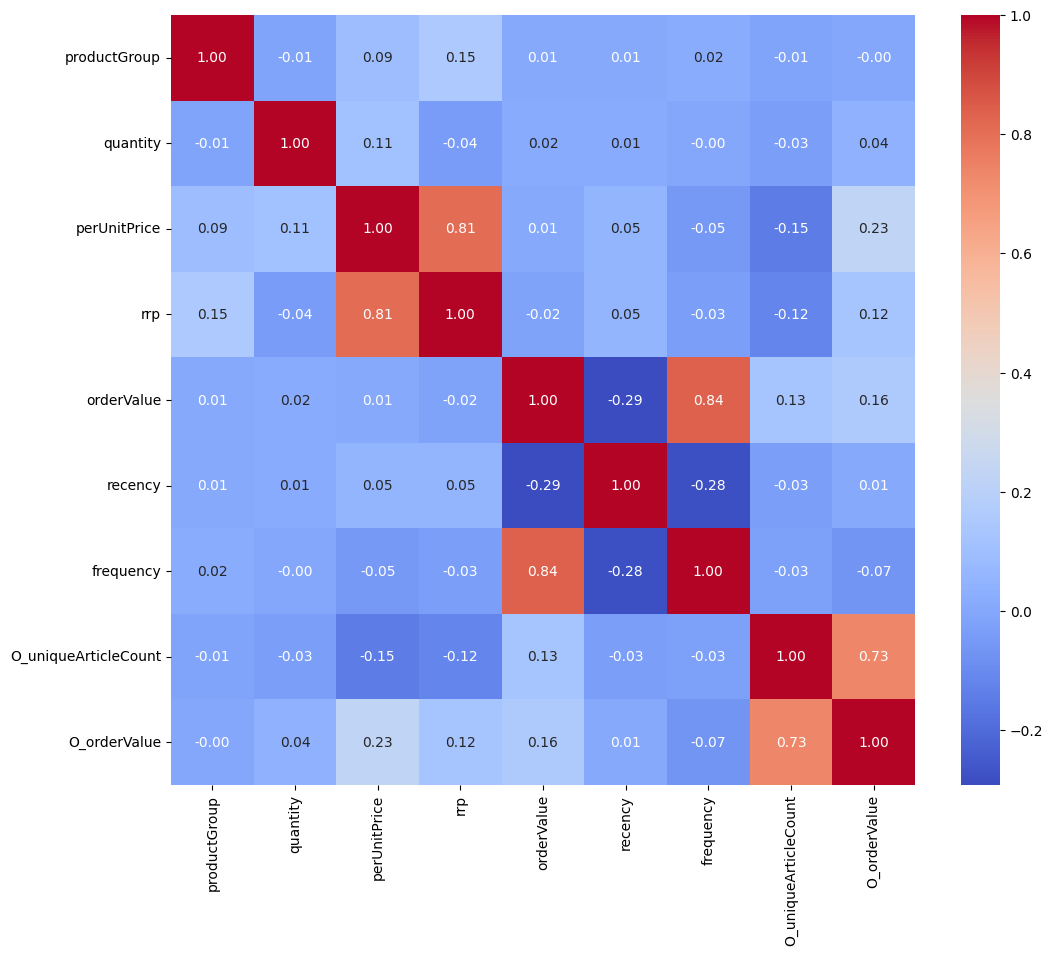

In [ ]:
import seaborn as sns

correlation_matrix = df_master_data[['productGroup', 'quantity', 'perUnitPrice', 'rrp',
       'orderValue', 'recency', 'frequency',
       'O_uniqueArticleCount', 'O_orderValue']].corr()
# Set the size of the heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

## Model - Combined Features

In [ ]:
# creating input feature and output:
y = X['target']
X = X.drop('target', axis=1)

Decision Tree with hyperparametr tunning

In [52]:
# Split the entire dataset into training and test sets that will be used in ensemble of all 10 decision trees
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_parts = np.array_split(X_train, 10)
y_parts = np.array_split(y_train, 10)

param_grid = {
    'max_depth': [9, 11, 13, 17],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'splitter': ['best', 'random']
}

# Train decision tree classifiers on each part
trained_models = []
for X_part, y_part in zip(X_parts, y_parts):
    model, _, _ = train_decision_tree(X_part, y_part, random_state=42, param_grid=param_grid)  # Include param_grid
    trained_models.append(model)

# Combine trained decision tree classifiers into one model
# For simplicity, you can consider using an ensemble method like VotingClassifier
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[('model_{}'.format(i), model) for i, model in enumerate(trained_models)])

# Optionally, you can further train the ensemble model on the entire dataset
ensemble_model.fit(X_train, y_train)


# Make predictions using the ensemble model
y_pred = ensemble_model.predict(x_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4

Random Forest with hyperparamter tunning

In [53]:
# Split the entire dataset into training and test sets that will be used in ensemble of all 10 decision trees
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_parts = np.array_split(X_train, 10)
y_parts = np.array_split(y_train, 10)

param_grid = {
    'n_estimators': [100],
    'max_depth': [7],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Train decision tree classifiers on each part
trained_models_rf = []
for X_part, y_part in zip(X_parts, y_parts):
    model, _, _ = train_random_forest(X_part, y_part, random_state=42, param_grid=param_grid)  # Include param_grid
    trained_models_rf.append(model)

# Combine trained decision tree classifiers into one model
from sklearn.ensemble import VotingClassifier
ensemble_model_rf = VotingClassifier(estimators=[('model_{}'.format(i), model) for i, model in enumerate(trained_models_rf)])

# Optionally, you can further train the ensemble model on the entire dataset
ensemble_model_rf.fit(X_shuffled, y_shuffled)


# Make predictions using the ensemble model
y_pred_rf = ensemble_model_rf.predict(x_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Accuracy: 0.6341171232979829
Precision: 0.6511626925511711
Recall: 0.6382125927580473
F1-score: 0.6446226091897357


XgBoost

In [59]:
# Split the entire dataset into training and test sets that will be used in ensemble of all 10 decision trees
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_parts = np.array_split(X_train, 10)
y_parts = np.array_split(y_train, 10)

# Define hyperparameter grids for XGBoost
'''
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}
'''
# Train decision tree classifiers on each part
trained_models = []
for X_part, y_part in zip(X_parts, y_parts):
    model, _, _ = train_simple_xgboost(X_part, y_part, random_state=42)  # Include param_grid
    trained_models.append(model)

# Combine trained decision tree classifiers into one model
# For simplicity, you can consider using an ensemble method like VotingClassifier
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[('model_{}'.format(i), model) for i, model in enumerate(trained_models)])

# Optionally, you can further train the ensemble model on the entire dataset
ensemble_model.fit(X_train, y_train)


# Make predictions using the ensemble model
y_pred = ensemble_model.predict(x_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:20:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:21:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.



Accuracy: 0.649496841684177
Precision: 0.6486777199491242
Recall: 0.7109299382026655
F1-score: 0.678378661067223
